✅ Dataset Loaded

--- Dataset Shape (rows, cols) ---
(140, 9)

--- Data Types & Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits

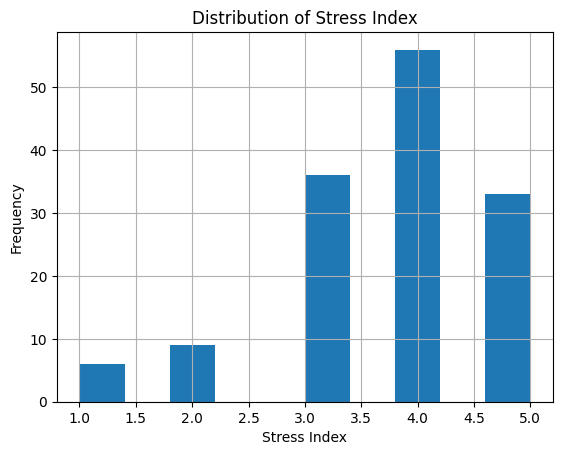


--- Academic Stage Counts ---
Your Academic Stage
undergraduate    100
high school       29
post-graduate     11
Name: count, dtype: int64

--- Study Environment Counts ---
Study Environment
Peaceful     69
disrupted    38
Noisy        32
Unknown       1
Name: count, dtype: int64

--- Correlation Matrix ---
                                                    Peer pressure  \
Peer pressure                                            1.000000   
Academic pressure from your home                         0.370275   
What would you rate the academic  competition i...       0.200558   
Rate your academic stress index                          0.474426   

                                                    Academic pressure from your home  \
Peer pressure                                                               0.370275   
Academic pressure from your home                                            1.000000   
What would you rate the academic  competition i...                          0.12

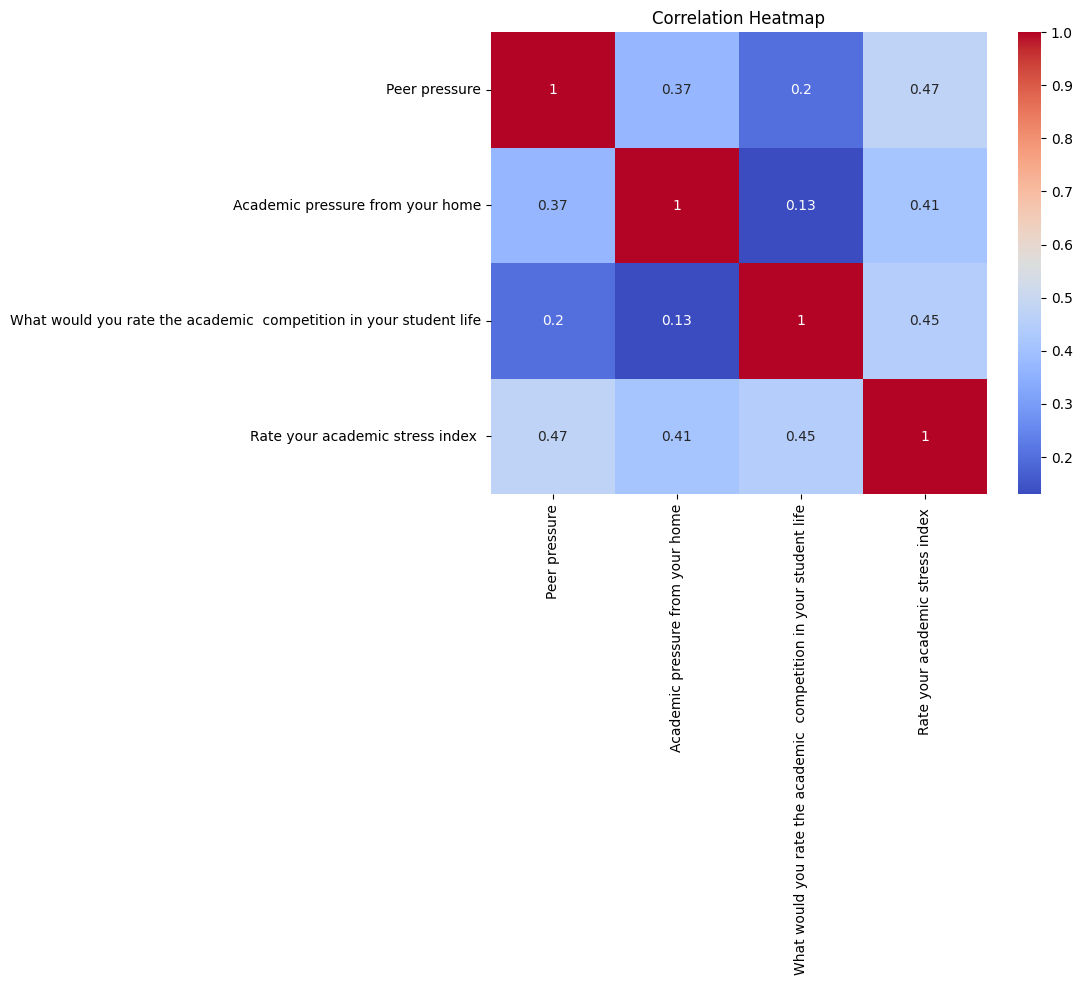

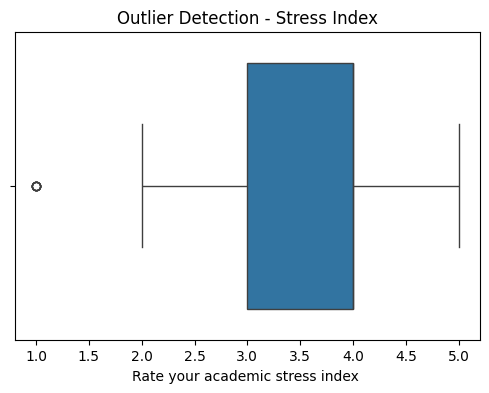

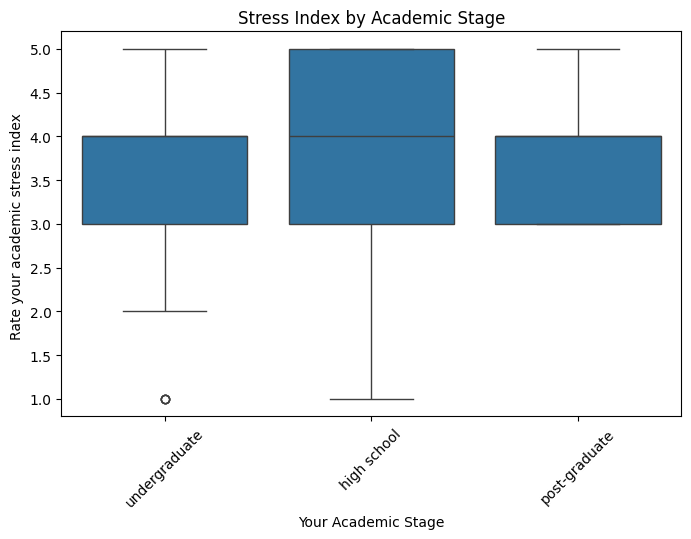

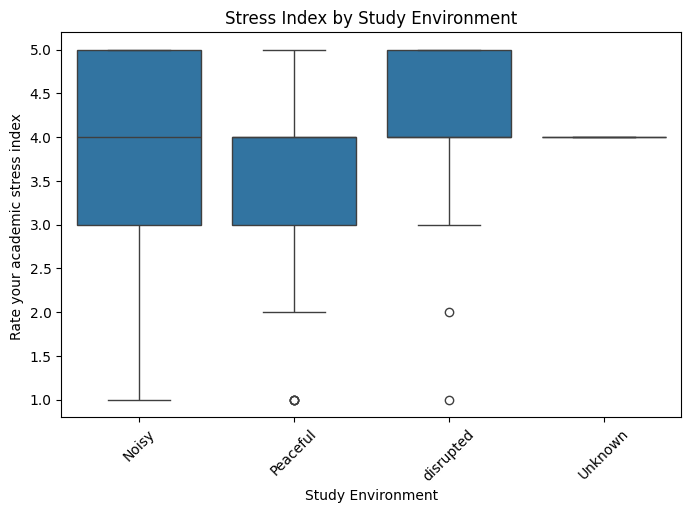


⚠️ 'Quiet' or 'Noisy' categories not found in Study Environment


/tmp/ipython-input-4024728920.py:116: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


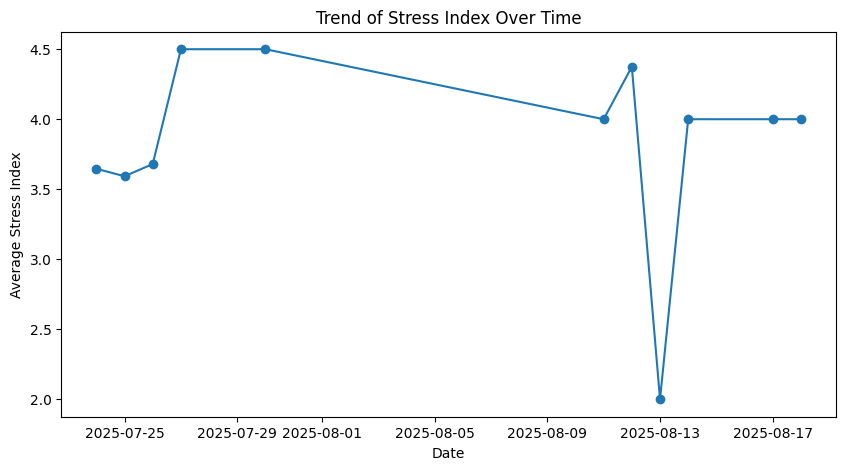


✅ EDA Completed Successfully


In [ ]:
# =====================================
# STEP 1: Import Libraries
# =====================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# =====================================
# STEP 2: Load Dataset
# =====================================
df = pd.read_csv("academic Stress level - maintainance 1.csv")
print(" Dataset Loaded")

# =====================================
# STEP 3: Basic Exploration
# =====================================
print("\n--- Dataset Shape (rows, cols) ---")
print(df.shape)

print("\n--- Data Types & Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

# =====================================
# STEP 4: Data Cleaning
# =====================================
# Fill missing values in Study Environment
df['Study Environment'] = df['Study Environment'].fillna("Unknown")

# Drop duplicate rows
df = df.drop_duplicates()

print("\n--- After Cleaning ---")
print(df.isnull().sum())

# =====================================
# STEP 5: Summary Statistics
# =====================================
print("\n--- Summary Statistics (Numeric Columns) ---")
print(df.describe())

# Histogram of Stress Index
df['Rate your academic stress index '].hist()
plt.title("Distribution of Stress Index")
plt.xlabel("Stress Index")
plt.ylabel("Frequency")
plt.show()

# Frequency counts for categorical variables
print("\n--- Academic Stage Counts ---")
print(df['Your Academic Stage'].value_counts())

print("\n--- Study Environment Counts ---")
print(df['Study Environment'].value_counts())

# =====================================
# STEP 6: Correlation Analysis
# =====================================
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
print("\n--- Correlation Matrix ---")
print(numeric_df.corr())

# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# =====================================
# STEP 7: Outlier Detection
# =====================================
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Rate your academic stress index '])
plt.title("Outlier Detection - Stress Index")
plt.show()

# =====================================
# STEP 8: Group Comparisons
# =====================================
# Stress Index by Academic Stage
plt.figure(figsize=(8,5))
sns.boxplot(x='Your Academic Stage', y='Rate your academic stress index ', data=df)
plt.title("Stress Index by Academic Stage")
plt.xticks(rotation=45)
plt.show()

# Stress Index by Study Environment
plt.figure(figsize=(8,5))
sns.boxplot(x='Study Environment', y='Rate your academic stress index ', data=df)
plt.title("Stress Index by Study Environment")
plt.xticks(rotation=45)
plt.show()

# =====================================
# STEP 9: Hypothesis Testing
# =====================================
# Example: Compare Quiet vs Noisy environments
if "Quiet" in df['Study Environment'].unique() and "Noisy" in df['Study Environment'].unique():
    group1 = df[df['Study Environment'] == 'Quiet']['Rate your academic stress index ']
    group2 = df[df['Study Environment'] == 'Noisy']['Rate your academic stress index ']

    t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
    print("\n--- T-test Result (Quiet vs Noisy) ---")
    print("t-statistic =", t_stat, ", p-value =", p_val)
else:
    print("\n 'Quiet' or 'Noisy' categories not found in Study Environment")

# =====================================
# STEP 10: Time Trends (if Timestamp column exists)
# =====================================
if "Timestamp" in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    time_trend = df.groupby(df['Timestamp'].dt.date)['Rate your academic stress index '].mean()

    plt.figure(figsize=(10,5))
    time_trend.plot(marker='o')
    plt.title("Trend of Stress Index Over Time")
    plt.xlabel("Date")
    plt.ylabel("Average Stress Index")
    plt.show()
else:
    print("\n No Timestamp column found for trend analysis")

print("\nEDA Completed Successfully")
